# Telecom Customer Churn Analysis

## Importing libraries & reading data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('telecom_customer_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [6]:
nan_counts = df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         15

## Exploratory Data Analysis

Since the data which we are going to use for answer few questions, we will do the data cleaning after EDA.

In [68]:
sns.set_style('darkgrid')

#### Question 1 : How many customers joined during the last quarter?

**454** customers joined the company during last quarter.

In [38]:
len(df[(df['Tenure in Months'] <= 3) & (df['Customer Status'] == 'Joined')])

454

#### Question 2 : What is the customer profile for a customer that churned, joined, & stayed? Are they different?

From the chart "Age Distributio by Customer Status", we don't se any pattern in the age of the customer. Nearly equal number of customers can be seen in all the 3 customer status groups. Same goes for the rest of the two bar charts.

In [41]:
demographics = df[['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents','Customer Status']]

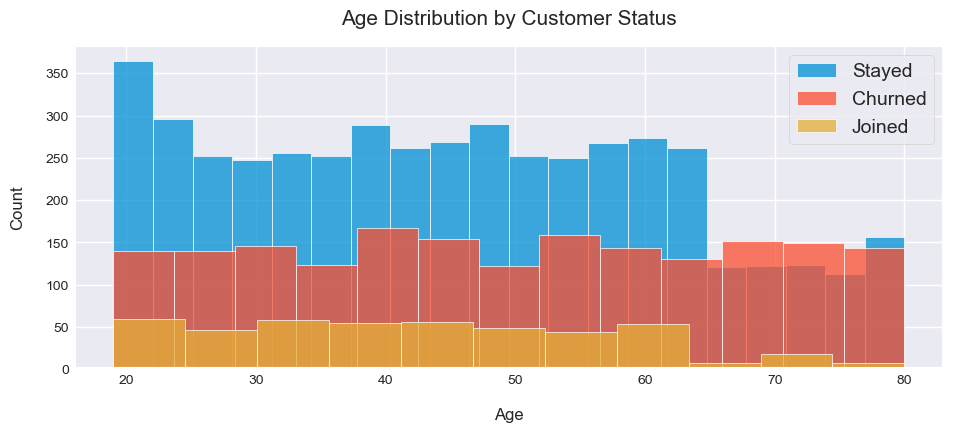

In [85]:
plt.figure(figsize=(10,4))
sns.histplot(data=demographics[demographics['Customer Status'] == 'Stayed'], x='Age', label='Stayed')
sns.histplot(data=demographics[demographics['Customer Status'] == 'Churned'], x='Age',label='Churned')
sns.histplot(data=demographics[demographics['Customer Status'] == 'Joined'], x='Age',label='Joined')
plt.legend()
plt.xlabel('Age', fontsize=12, labelpad=15)
plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Age Distribution by Customer Status', fontsize=15, pad=15)
plt.show()

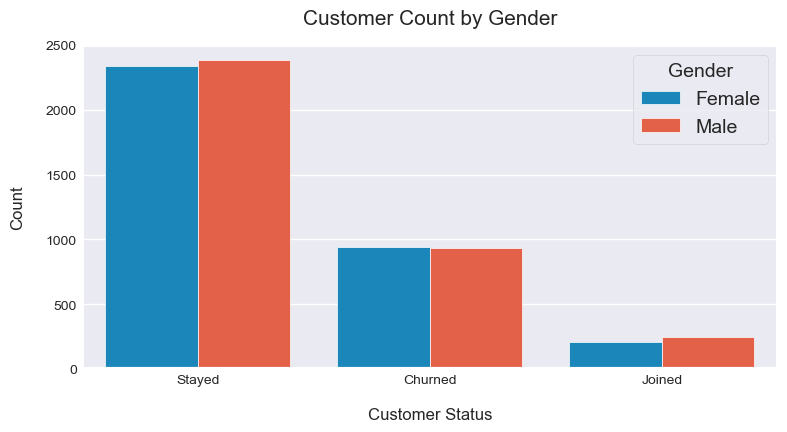

In [91]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Customer Status', hue='Gender')
plt.xlabel('Customer Status', fontsize=12, labelpad=15)
plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Customer Count by Gender', fontsize=15, pad=15)
plt.show()

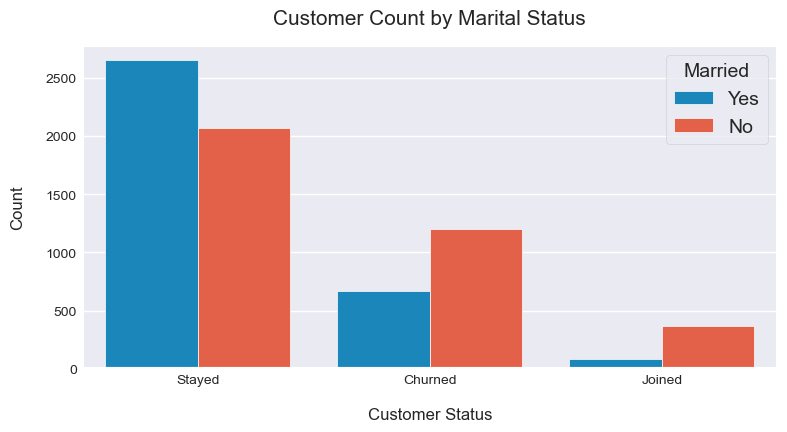

In [96]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Customer Status', hue='Married')
plt.xlabel('Customer Status', fontsize=12, labelpad=15)
plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Customer Count by Marital Status', fontsize=15, pad=15)
plt.show()

#### Question 3 : What seem to be the key drivers of customer churn?

- The first key driver of customer churn seems to be a potential competitor and if we look at the second table below, out of top 5 churn reasons, 3 reason are related to competitor mentioning either competitor had better device or service. 

- The second key driver of churn is dissatisfaction & attitude of either support person or service provider.

In [105]:
pd.DataFrame(df[df['Customer Status'] == 'Churned']['Churn Category'].value_counts())

,count
Churn Category,
Competitor,841
Dissatisfaction,321
Attitude,314
Price,211
Other,182


In [104]:
pd.DataFrame(df[df['Customer Status'] == 'Churned']['Churn Reason'].value_counts())

,count
Churn Reason,
Competitor had better devices,313
Competitor made better offer,311
Attitude of support person,220
Don't know,130
Competitor offered more data,117
Competitor offered higher download speeds,100
Attitude of service provider,94
Price too high,78
Product dissatisfaction,77


#### Question 4 : Is the company losing high value customers? If so, how can they retain them?

Company does not seem to be losing high value customers. Looking at the histogram chart below, Most of the customers who have left the company after customers with revenue between 0 to 1,000 dollars. However, more that 1000 customers have left generating 500 dollars revenue per customer on an average resulting in loss of approx. $5,00,000. Company needs to focus on those customers as well.

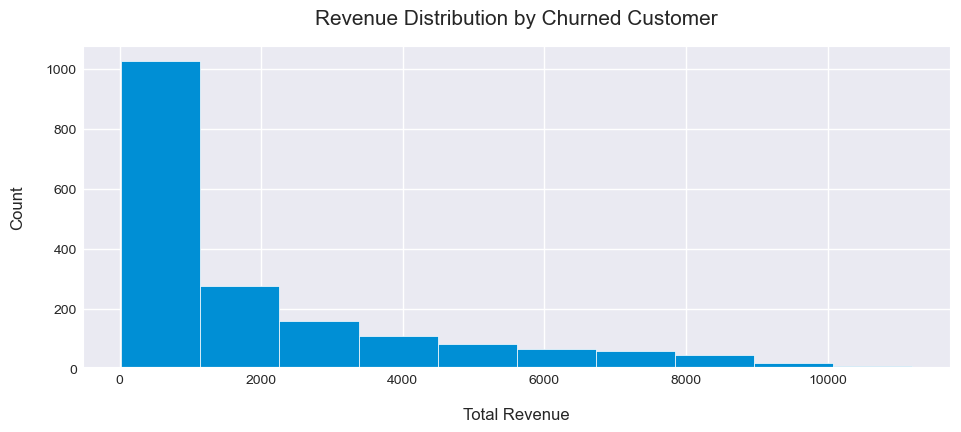

In [103]:
plt.figure(figsize=(10,4))
plt.hist(data=df[df['Customer Status'] == 'Churned'], x='Total Revenue')
plt.xlabel('Total Revenue', fontsize=12, labelpad=15)
plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Revenue Distribution by Churned Customer', fontsize=15, pad=15)
plt.show()

## ML Model for Churn Prediction

### Preparing data for model

In [108]:
# Replacing NaN with mean value in 'Avg Monthly Long Distance Charges'
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean())

In [145]:
ml_data = df.drop(['Customer ID','Gender','Married','Number of Dependents','City', 'Zip Code', 'Latitude', 'Longitude', 'Offer','Number of Referrals','Multiple Lines','Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing','Payment Method',
       'Streaming Music', 'Unlimited Data','Churn Category', 'Churn Reason'], axis=1)

### Creating dummy columns

In [146]:
def get_dummy(value):
    if value == 'Yes':
        return 1
    else:
        return 0

In [147]:
ml_data['Phone Service'] = ml_data['Phone Service'].apply(get_dummy)
ml_data['Internet Service'] = ml_data['Internet Service'].apply(get_dummy)

In [144]:
def get_contract_dummy(value):
    if value == 'Month-to-Month':
        return 0
    elif value == 'One Year':
        return 1
    else:
        return 2

In [149]:
ml_data['Contract'] = ml_data['Contract'].apply(get_contract_dummy)

In [151]:
def cust_stat_dummy(value):
    if value == 'Churned':
        return 0
    elif value == 'Stayed':
        return 1
    else:
        return 2

In [152]:
ml_data['Customer Status'] = ml_data['Customer Status'].apply(cust_stat_dummy)

## Model Building

#### Using StandardScaler to scaler down the data in same numerical range.

In [154]:
X = ml_data.drop('Customer Status', axis=1)
y = ml_data['Customer Status']

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
scaler = StandardScaler()

In [158]:
scaler.fit(X)
X_scaled = scaler.transform(X)

#### Splitting data into training & testing data

In [163]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=101)

#### Building Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
model = RandomForestClassifier(n_estimators=200)

In [192]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [193]:
preds = model.predict(X_test)

#### Model Accuracy

In [194]:
from sklearn.metrics import classification_report, confusion_matrix

In [195]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       379
           1       0.86      0.95      0.90       930
           2       0.63      0.57      0.60       100

    accuracy                           0.81      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.80      0.81      0.80      1409



## Conclusion

- As we can see from the classification report, the accuracy of the model is **81%** which is not so good. The reason for the low accuracy of the model is because we removed many features from our data because they had NaN values as well.